<a href="https://colab.research.google.com/github/chrishare/colab_deeplearning/blob/master/keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Target label is 2


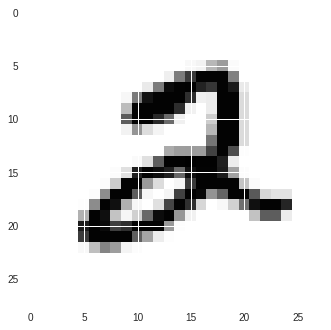

In [1]:
# This listing uses Keras to train a deep neural net on the MNIST digit dataset

# First, import tensorflow, numpy and matplotlib
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Download the mnist dataset. The training data will be (28, 28) ndarrays of 
# ints between 0 (white) and 255 (black) and labels are ints from 0 to 9
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# We want to scale the data to be on a scale of 0.0 (white) to 1.0 (black) - 
# scaling is especially useful when we have many feautures, since features on 
# smaller scales will get overwhelmed by feautures on big scales
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a helper function for rendering an image - matplotlib expects ints 
# from 0 (white) to 255 (black)
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

gen_image(x_train[5])
print('Target label is {}'.format(y_train[5]))


In [2]:
# Okay, create a model of sequential layers 
# 1. Flatter the (28, 28) input into a vector
# 2. Feed the input into 512-nueron layer fully connected, activating with relu
# 3. Kill 20% of neurons randomly, for training, to regularize
# 4. Output layer of 10 mutually exclusive categories, given us an array
#    of 10 floats representing the probability it is that class (0.0 to 1.0)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model, optomizing with adaptive momentum (adam), sparse cross
# entropy as the loss function, and accuracy as the evaluation metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Actually execute the training of the model against the dataset, using batches
# of 32 by default and 5 full passes through the dataset
model.fit(x_train, y_train, epochs=5)

# Evaluate how good the model is after training, on a test set
model.evaluate(x_test, y_test)



Epoch 1/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.2014 - acc: 0.9400
Epoch 2/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.0818 - acc: 0.9751
Epoch 3/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.0515 - acc: 0.9836
Epoch 4/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.0372 - acc: 0.9882
Epoch 5/5
10000/10000 [==============================] - 1s 78us/step


[0.07235417631478631, 0.9768]

1


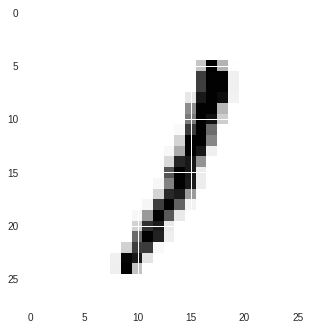

In [3]:
# We can make new predictions using the model. We can also save it if we want.
test_item = x_train[99].reshape(1, 28, 28)
gen_image(test_item)
predict = model.predict(test_item, batch_size=1)
print(np.argmax(predict))